In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Loading Data
df = pd.read_csv('/Users/Kevin/Files/Thinkful/Data Files/WELLCOME/WELLCOME_APCspend2013_forThinkful.csv',encoding ='latin1')
df.head(n=10)

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,£2392.20
6,PMC3709265,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,£2367.95
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,£649.33
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,£1294.78


In [116]:
#Info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 5 columns):
PMID/PMCID                                             1928 non-null object
Publisher                                              2127 non-null object
Journal title                                          2126 non-null object
Article title                                          2127 non-null object
COST (£) charged to Wellcome (inc VAT when charged)    2127 non-null object
dtypes: object(5)
memory usage: 83.2+ KB


# Determine the five most common journals and the total articles for each

In [117]:
#Finding top 10 Journals and grouping remaining to other category
df['Journal title'].value_counts()
journal_count = df['Journal title'].value_counts()
top_journal = journal_count.nlargest(5)
print (top_journal)

PLoS One                                           92
PLoS ONE                                           62
Journal of Biological Chemistry                    48
Nucleic Acids Research                             21
Proceedings of the National Academy of Sciences    19
Name: Journal title, dtype: int64


In [118]:
# There is one journal spelt in two different ways
# Cleaning up to show only one Journal

#Creating another dataframe to modify
df_1 = df 
#Capitalizing the Journal Title
df_1['Journal title'] = df_1['Journal title'].str.upper()
df_1.head(n=10)


#df_1 = df.apply(lambda x: df['Journal title'].str.upper())

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,PSYCHOLOGICAL MEDICINE,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,BIOMACROMOLECULES,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J MED CHEM,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J MED CHEM,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J ORG CHEM,Regioselective opening of myo-inositol orthoes...,£685.88
5,PMC3579457,ACS,JOURNAL OF MEDICINAL CHEMISTRY,Comparative Structural and Functional Studies ...,£2392.20
6,PMC3709265,ACS,JOURNAL OF PROTEOME RESEARCH,Mapping Proteolytic Processing in the Secretom...,£2367.95
7,23057412 PMC3495574,ACS,MOL PHARM,Quantitative silencing of EGFP reporter gene b...,£649.33
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS CHEMICAL BIOLOGY,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS CHEMICAL BIOLOGY,Chemical proteomic analysis reveals the drugab...,£1294.78


In [119]:
#Finding top 10 Journals and grouping remaining to other category - AGAIN
df_1['Journal title'].value_counts()
journal_count = df_1['Journal title'].value_counts()
top_journal = journal_count.nlargest(5)
print (top_journal)

PLOS ONE                           190
JOURNAL OF BIOLOGICAL CHEMISTRY     53
NEUROIMAGE                          29
PLOS GENETICS                       24
PLOS PATHOGENS                      24
Name: Journal title, dtype: int64


In [120]:
#Filtering dataframe with only the top 5 journals 

#Function that filters out journals that are not top 5
top_5_journal = ['PLOS ONE',
                 'JOURNAL OF BIOLOGICAL CHEMISTRY',
                 'NEUROIMAGE',
                 'PLOS GENETICS',
                 'PLOS PATHOGENS']

df_2 = df_1[df_1['Journal title'].isin(top_5_journal)]

df_2.head(n=50)

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
16,22610094,AMBSB,JOURNAL OF BIOLOGICAL CHEMISTRY,Annexin-1 interaction with FPR2/ALX,£265.67
60,PMC3576085,American Soc for Biochemistry and Molecular Bi...,JOURNAL OF BIOLOGICAL CHEMISTRY,Understanding how noncatalytic carbohydrate bi...,£1100.00
61,23239883 PMC3561570,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,Molecular architecture and functional analysis...,£2259.64
64,PMCID: PMC3642348,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,Human and viral golgi anti-apoptotic protein (...,£1019.71
65,PMID: 22992744 PMC3493908,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,Dynamic exchange of myosin VI on endocytic str...,£1119.61
66,PMCID: PMC3531748,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,Uncoupling proteostasis and development in vit...,£1131.01
67,PMCID: PMC3436574\n,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,Structural Requirements for Recognition of Maj...,£1137.51
68,PMID: 23223336 PMC3543027,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,Visualization of structural changes accompanyi...,£1152.72
69,PMCID: PMC3795252,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,SLP-76 sterile alpha motif (SAM) and individua...,£1160.09
70,PMCID: PMC3724652,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,?-Amino-3-hydroxy-5-methyl-4-isoxazole propion...,£1166.85


In [121]:
#Counting article titles
df_2.groupby('Journal title').count()

,PMID/PMCID,Publisher,Article title,COST (£) charged to Wellcome (inc VAT when charged)
Journal title,,,,
JOURNAL OF BIOLOGICAL CHEMISTRY,52,53,53,53
NEUROIMAGE,28,29,29,29
PLOS GENETICS,23,24,24,24
PLOS ONE,188,190,190,190
PLOS PATHOGENS,24,24,24,24


The top 5 Journals are:
1. PLOS ONE
2. JOURNAL OF BIOLOGICAL CHEMISTRY
3. NEUROIMAGE
4. PLOS GENETICS
5. PLOS PATHOGENS

The number of articles within each Journal is (respectively):
1. 190
2. 53
3. 29
4. 24
5. 24

***

# Calculate the mean, median, and standard deviation of the open-access cost per article for each journal 

In [122]:
#Need to change 'COST (£) charged to Wellcome (inc VAT when charged)' column to numberic type

df_2['COST'] = df_2['COST (£) charged to Wellcome (inc VAT when charged)'].str.replace('£', '')
df_2['COST'] = df_2['COST'].str.replace('$', '')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [123]:
df_2.head(n=50)
#df_2.info()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged),COST
16,22610094,AMBSB,JOURNAL OF BIOLOGICAL CHEMISTRY,Annexin-1 interaction with FPR2/ALX,£265.67,265.67
60,PMC3576085,American Soc for Biochemistry and Molecular Bi...,JOURNAL OF BIOLOGICAL CHEMISTRY,Understanding how noncatalytic carbohydrate bi...,£1100.00,1100.00
61,23239883 PMC3561570,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,Molecular architecture and functional analysis...,£2259.64,2259.64
64,PMCID: PMC3642348,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,Human and viral golgi anti-apoptotic protein (...,£1019.71,1019.71
65,PMID: 22992744 PMC3493908,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,Dynamic exchange of myosin VI on endocytic str...,£1119.61,1119.61
66,PMCID: PMC3531748,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,Uncoupling proteostasis and development in vit...,£1131.01,1131.01
67,PMCID: PMC3436574\n,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,Structural Requirements for Recognition of Maj...,£1137.51,1137.51
68,PMID: 23223336 PMC3543027,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,Visualization of structural changes accompanyi...,£1152.72,1152.72
69,PMCID: PMC3795252,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,SLP-76 sterile alpha motif (SAM) and individua...,£1160.09,1160.09
70,PMCID: PMC3724652,American Society for Biochemistry and Molecula...,JOURNAL OF BIOLOGICAL CHEMISTRY,?-Amino-3-hydroxy-5-methyl-4-isoxazole propion...,£1166.85,1166.85


In [124]:
#Make cost column into float
df_2['COST'] = df_2['COST'].apply(pd.to_numeric)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [125]:
#Check cost column is float
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 16 to 1604
Data columns (total 6 columns):
PMID/PMCID                                             315 non-null object
Publisher                                              320 non-null object
Journal title                                          320 non-null object
Article title                                          320 non-null object
COST (£) charged to Wellcome (inc VAT when charged)    320 non-null object
COST                                                   320 non-null float64
dtypes: float64(1), object(5)
memory usage: 17.5+ KB


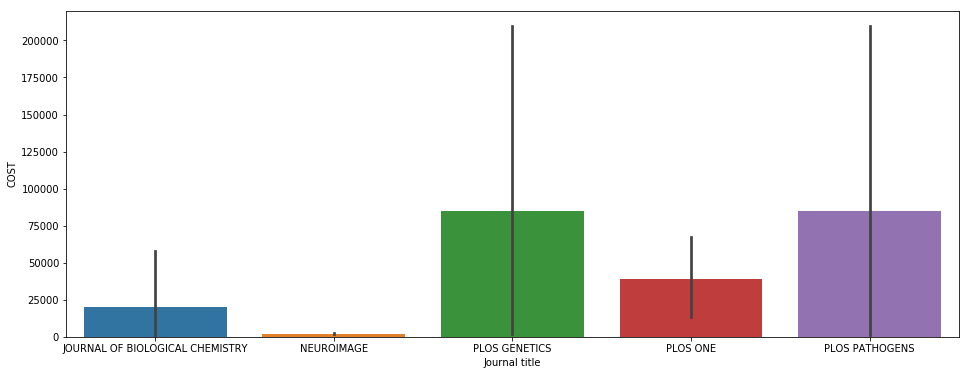

In [126]:
#Checking any erroneous values
plt.figure(figsize=(16, 6))
sns.barplot(x="Journal title", y="COST", data = df_2)
plt.show()

In [127]:
#PLOS GENETICS and PLOS PATHOGENS have extreme values (Large Values)
df_2['COST'].nlargest(300)

149     999999.00
1386    999999.00
1387    999999.00
1560    999999.00
1561    999999.00
1562    999999.00
1563    999999.00
1564    999999.00
1565    999999.00
1566    999999.00
1597    999999.00
1598    999999.00
1470    192645.00
714       2503.34
715       2503.34
77        2501.07
713       2484.23
712       2466.45
711       2445.75
710       2432.33
709       2420.79
708       2396.57
707       2395.87
706       2395.43
705       2385.25
704       2382.88
438       2345.00
148       2344.79
703       2343.65
702       2326.43
          ...    
1513       852.53
1512       852.43
1511       850.50
1510       850.00
1509       847.73
1508       846.32
1507       844.52
1506       843.78
1505       843.72
1504       842.17
1502       841.65
1503       841.65
1500       836.43
1501       836.43
1499       836.02
1498       830.97
1497       830.05
1478       825.68
1479       825.68
1480       825.68
1481       825.68
1482       825.68
1483       825.68
1484       825.68
1485      

In [128]:
#creating new dataframe and removing any number greater than 3000
df_3 = df_2[df_2['COST'] < 3000] 

In [129]:
#Check
df_3['COST'].nlargest(300)

714     2503.34
715     2503.34
77      2501.07
713     2484.23
712     2466.45
711     2445.75
710     2432.33
709     2420.79
708     2396.57
707     2395.87
706     2395.43
705     2385.25
704     2382.88
438     2345.00
148     2344.79
703     2343.65
702     2326.43
701     2314.32
147     2311.57
700     2298.35
699     2280.14
61      2259.64
698     2224.47
697     2142.80
696     2118.57
695     2100.54
146     2032.22
145     2003.13
694     1961.25
1385    1809.51
         ...   
1501     836.43
1499     836.02
1498     830.97
1497     830.05
1478     825.68
1479     825.68
1480     825.68
1481     825.68
1482     825.68
1483     825.68
1484     825.68
1485     825.68
1486     825.68
1487     825.68
1488     825.68
1489     825.68
1490     825.68
1491     825.68
1492     825.68
1493     825.68
1494     825.68
1495     825.68
1496     825.68
1295     819.34
1294     809.29
1293     794.93
1477     773.45
1476     747.05
1475     741.35
1474     534.26
Name: COST, Length: 300,

In [130]:
#Checking if any 0s 
df_3['COST'].nsmallest(10)

1469    122.31
1471    214.74
16      265.67
1472    329.79
1304    389.73
1473    424.95
1305    443.38
1474    534.26
1475    741.35
1476    747.05
Name: COST, dtype: float64

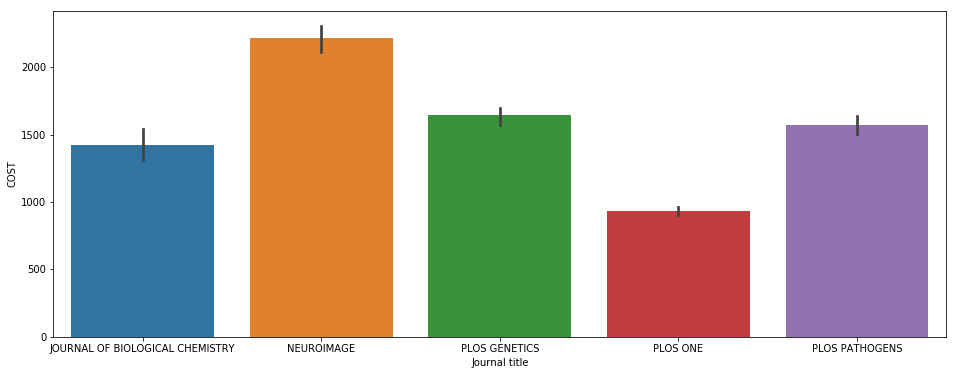

In [132]:
#Checking any erroneous values
plt.figure(figsize=(16, 6))
sns.barplot(x="Journal title", y="COST", data = df_3)
plt.show()

In [131]:
#Calculating Mean, Median and Standard Deviation for each Journal
print("Mean:")
print(df_3.groupby('Journal title')['COST'].mean())
print("")
print("Median:")
print(df_3.groupby('Journal title')['COST'].median())
print("")
print("Standard Deviation:")
print(df_3.groupby('Journal title')['COST'].std())

Mean:
Journal title
JOURNAL OF BIOLOGICAL CHEMISTRY    1423.588462
NEUROIMAGE                         2215.168276
PLOS GENETICS                      1643.110909
PLOS ONE                            934.655824
PLOS PATHOGENS                     1572.866818
Name: COST, dtype: float64

Median:
Journal title
JOURNAL OF BIOLOGICAL CHEMISTRY    1301.140
NEUROIMAGE                         2326.430
PLOS GENETICS                      1712.730
PLOS ONE                            896.975
PLOS PATHOGENS                     1600.250
Name: COST, dtype: float64

Standard Deviation:
Journal title
JOURNAL OF BIOLOGICAL CHEMISTRY    411.954360
NEUROIMAGE                         266.653947
PLOS GENETICS                      153.366825
PLOS ONE                           201.847589
PLOS PATHOGENS                     161.780891
Name: COST, dtype: float64
